In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

In [4]:
root_path = Path().absolute()

paths = [
    root_path / "COMPAS.train",
    root_path / "COMPAS.validation",
    root_path / "COMPAS.test",
]

In [13]:
target_col_name = "two_year_recid"
sensitive_col_name = "race_Caucasian"

In [5]:
"""
def process_data(path):
    data = pd.read_csv(path, header=0, index_col=0, sep=",")
    
    # Move sensitive and label to the front
    data.insert(0, sensitive_col_name, data.pop(sensitive_col_name))
    data.insert(0, target_col_name, data.pop(target_col_name))

    data.to_csv(f"{path}.tab", sep="\t", index=False)


for p in paths:
    process_data(p)
"""

'\ndef process_data(path):\n    target_col_name = "two_year_recid"\n    sensitive_col_name = "race_Caucasian"\n\n    data = pd.read_csv(path, header=0, index_col=0, sep=",")\n    \n    # Move sensitive and label to the front\n    data.insert(0, sensitive_col_name, data.pop(sensitive_col_name))\n    data.insert(0, target_col_name, data.pop(target_col_name))\n\n    data.to_csv(f"{path}.tab", sep="\t", index=False)\n\n\nfor p in paths:\n    process_data(p)\n'

___

In [6]:
def load_data(path):
    return pd.read_csv(path, sep="\t", header=0, index_col=None)

train, val, test = (load_data(p) for p in paths)

In [14]:
train.shape

(3148, 30)

In [12]:
val.shape

(1047, 30)

In [13]:
test.shape

(1083, 30)

In [16]:
# Merge val and test
new_test = pd.concat((val, test), axis=0, ignore_index=True)
new_test

,two_year_recid,race_Caucasian,juv_fel_count,priors_count,juv_other_count,age,juv_misd_count,days_b_screening_arrest,is_recid,c_charge_degree_F,...,score_text_High,score_text_Low,score_text_Medium,first,priors_count_bucketized_0,priors_count_bucketized_1,priors_count_bucketized_2,priors_count_bucketized_3,priors_count_bucketized_4,type_of_assessment_Risk of Recidivism
0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,-1.0,0.0,1.0,...,0.0,1.0,0.0,1320,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,52.0,0.0,-1.0,0.0,1.0,...,0.0,1.0,0.0,738,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,21.0,0.0,-1.0,1.0,1.0,...,0.0,1.0,0.0,797,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1275,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,15.0,0.0,43.0,0.0,-1.0,1.0,0.0,...,1.0,0.0,0.0,1697,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,1.0,0.0,0.0,0.0,33.0,0.0,-2.0,1.0,0.0,...,0.0,1.0,0.0,797,1.0,0.0,0.0,0.0,0.0,1.0
2126,0.0,1.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,325,1.0,0.0,0.0,0.0,0.0,1.0
2127,0.0,1.0,0.0,1.0,1.0,35.0,0.0,-1.0,0.0,1.0,...,0.0,1.0,0.0,354,1.0,0.0,0.0,0.0,0.0,1.0
2128,0.0,0.0,0.0,11.0,0.0,32.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1374,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
new_test = new_test.sample(frac=1, replace=False, random_state=42)
new_test

,two_year_recid,race_Caucasian,juv_fel_count,priors_count,juv_other_count,age,juv_misd_count,days_b_screening_arrest,is_recid,c_charge_degree_F,...,score_text_High,score_text_Low,score_text_Medium,first,priors_count_bucketized_0,priors_count_bucketized_1,priors_count_bucketized_2,priors_count_bucketized_3,priors_count_bucketized_4,type_of_assessment_Risk of Recidivism
282,0.0,1.0,0.0,1.0,0.0,33.0,0.0,-1.0,0.0,1.0,...,0.0,1.0,0.0,1149,1.0,0.0,0.0,0.0,0.0,1.0
2007,1.0,0.0,0.0,3.0,0.0,21.0,2.0,0.0,1.0,1.0,...,0.0,0.0,1.0,360,0.0,1.0,0.0,0.0,0.0,1.0
1712,1.0,0.0,0.0,10.0,0.0,30.0,0.0,18.0,1.0,1.0,...,0.0,0.0,1.0,1209,0.0,0.0,0.0,0.0,1.0,1.0
1665,1.0,0.0,0.0,2.0,0.0,23.0,0.0,-2.0,1.0,1.0,...,0.0,0.0,1.0,699,0.0,1.0,0.0,0.0,0.0,1.0
2026,1.0,0.0,0.0,6.0,0.0,28.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,354,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,1.0,0.0,1.0,0.0,26.0,0.0,-1.0,1.0,1.0,...,0.0,1.0,0.0,899,1.0,0.0,0.0,0.0,0.0,1.0
1095,0.0,0.0,0.0,0.0,0.0,53.0,0.0,-3.0,0.0,0.0,...,0.0,1.0,0.0,57,1.0,0.0,0.0,0.0,0.0,1.0
1130,1.0,0.0,0.0,0.0,0.0,43.0,0.0,-1.0,1.0,1.0,...,0.0,1.0,0.0,677,1.0,0.0,0.0,0.0,0.0,1.0
1294,1.0,0.0,0.0,19.0,1.0,47.0,0.0,-1.0,1.0,1.0,...,1.0,0.0,0.0,354,0.0,0.0,0.0,0.0,1.0,1.0


In [21]:
new_test.to_csv(f"COMPAS.test.new", sep="\t", index=False)

___

In [130]:
X_test = pd.read_csv("COMPAS.test", header=0, index_col=None, sep="\t")
y_test = X_test[target_col_name].to_numpy()
X_test.pop(target_col_name)
s_test = X_test[sensitive_col_name].to_numpy()

In [131]:
X_train = pd.read_csv("COMPAS.train", header=0, index_col=None, sep="\t")
y_train = X_train[target_col_name].to_numpy()
X_train.pop(target_col_name)
s_train = X_train[sensitive_col_name].to_numpy()

In [132]:
fairgbm_preds = pd.read_csv("FairGBM_predictions.txt", header=None).to_numpy().flatten()
lightgbm_preds = pd.read_csv("LightGBM_predictions.txt", header=None).to_numpy().flatten()
assert len(fairgbm_preds) == len(lightgbm_preds) == len(y_test)

In [133]:
caucasian_filter = (s_true == 1)
caucasian_indices = np.where(caucasian_filter)
non_caucasian_indices = np.where(~caucasian_filter)

In [151]:
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, score=0.5):
    num_rows = len(y_true)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred >= score).ravel()

    print(f"Accuracy: {(tp+tn) / num_rows:.1%}")
    print(f"Precision: {tp / (tp + fp):.1%}")
    print(f"FPR: {fp / (tn + fp):.1%}")
    print(f"TPR: {tp / (tp + fn):.1%}")
    print()

In [152]:
def print_groupwise_metrics(y_true, y_pred):
    print("_global metrics_")
    print_metrics(y_true, y_pred)

    print("_s=1 metrics_")
    print_metrics(y_true[caucasian_indices], y_pred[caucasian_indices])

    print("_s=0 metrics_")
    print_metrics(y_true[non_caucasian_indices], y_pred[non_caucasian_indices])

In [153]:
print("** FairGBM **")
print_groupwise_metrics(y_test, fairgbm_preds)

** FairGBM **
_global metrics_
Accuracy: 97.0%
Precision: 94.1%
FPR: 5.6%
TPR: 99.9%

_s=1 metrics_
Accuracy: 97.3%
Precision: 93.4%
FPR: 4.4%
TPR: 100.0%

_s=0 metrics_
Accuracy: 96.8%
Precision: 94.4%
FPR: 6.6%
TPR: 99.9%



In [154]:
print("** LightGBM **")
print_groupwise_metrics(y_test, lightgbm_preds)

** LightGBM **
_global metrics_
Accuracy: 97.0%
Precision: 94.1%
FPR: 5.6%
TPR: 99.9%

_s=1 metrics_
Accuracy: 97.3%
Precision: 93.4%
FPR: 4.4%
TPR: 100.0%

_s=0 metrics_
Accuracy: 96.8%
Precision: 94.4%
FPR: 6.6%
TPR: 99.9%



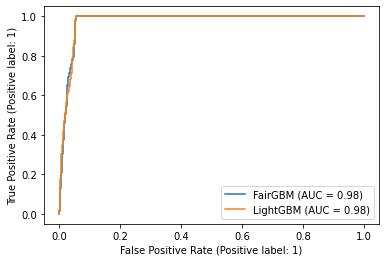

In [170]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(y_test, fairgbm_preds, name="FairGBM")
RocCurveDisplay.from_predictions(y_test, lightgbm_preds, ax=display.ax_, name="LightGBM")

In [160]:
import lightgbm as lgb
fairgbm_clf = lgb.Booster(model_file="FairGBM_model.txt")
fairgbm_preds_train = fairgbm_clf.predict(X_train)

[LightGBM] [Warning] The objective function 'constrained_cross_entropy' was not properly loaded. Resuming training is not available; everything else can be used as usual.


In [161]:
lightgbm_clf = lgb.Booster(model_file="LightGBM_model.txt")
lightgbm_preds_train = lightgbm_clf.predict(X_train)

In [157]:
print("** FairGBM **")
print_groupwise_metrics(y_train, fairgbm_preds_train)

** FairGBM **
_global metrics_
Accuracy: 97.3%
Precision: 94.5%
FPR: 5.2%
TPR: 100.0%

_s=1 metrics_
Accuracy: 96.9%
Precision: 94.0%
FPR: 5.9%
TPR: 100.0%

_s=0 metrics_
Accuracy: 97.3%
Precision: 94.4%
FPR: 5.0%
TPR: 100.0%



In [158]:
print("** LightGBM **")
print_groupwise_metrics(y_train, lightgbm_preds_train)

** LightGBM **
_global metrics_
Accuracy: 97.2%
Precision: 94.5%
FPR: 5.2%
TPR: 100.0%

_s=1 metrics_
Accuracy: 96.9%
Precision: 94.0%
FPR: 5.9%
TPR: 100.0%

_s=0 metrics_
Accuracy: 97.4%
Precision: 94.7%
FPR: 4.7%
TPR: 100.0%

